In [34]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [35]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [36]:
head(airbnb)

Zipcode Neighbourhood.Cleansed Property.Type Room.Type       Accommodates
1 28004   Universidad            Apartment     Private room    2           
2 28004   Universidad            Apartment     Entire home/apt 6           
3 28004   Universidad            Apartment     Entire home/apt 3           
4 28004   Universidad            Loft          Entire home/apt 3           
5 28015   Universidad            Apartment     Entire home/apt 5           
6 28004   Universidad            Apartment     Entire home/apt 2           
  Bathrooms Bedrooms Beds Bed.Type
1 2         1        1    Real Bed
2 1         3        5    Real Bed
3 1         2        2    Real Bed
4 2         1        1    Real Bed
5 1         1        1    Real Bed
6 1         0        1    Real Bed
  Amenities                                                                                                                                                                                                                                                                                                                                                       
1 TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron                                                                                                                                                                             
2 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo                                                                                                                                                                                     
3 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                          
4 TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                          
5 TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron                                                                                                                                                                                                              
6 TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry
  Square.Feet Price Review.Scores.Rating
1  NA         35     NA                 
2  NA         92     96                 
3  NA         55     91                 
4  NA         60    100                 
5 538         75     90                 
6  NA         55     95

Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [37]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

colnames(airbnb)<-(newnames)
str (airbnb)

'data.frame':	13207 obs. of  13 variables:
 $ CodigoPostal  : Factor w/ 77 levels "","-","20013",..: 15 15 15 15 26 15 15 15 26 15 ...
 $ Barrio        : Factor w/ 125 levels "Abrantes","Acacias",..: 115 115 115 115 115 115 115 115 115 115 ...
 $ TipoPropiedad : Factor w/ 22 levels "Apartment","Bed & Breakfast",..: 1 1 1 16 1 1 15 1 1 1 ...
 $ TipoAlquiler  : Factor w/ 3 levels "Entire home/apt",..: 2 1 1 1 1 1 2 1 1 1 ...
 $ MaxOcupantes  : int  2 6 3 3 5 2 7 3 2 4 ...
 $ NumBanyos     : num  2 1 1 2 1 1 5 1 1 2 ...
 $ NumDormitorios: int  1 3 2 1 1 0 1 1 1 2 ...
 $ NumCamas      : int  1 5 2 1 1 1 7 NA 1 2 ...
 $ TipoCama      : Factor w/ 5 levels "Airbed","Couch",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Comodidades   : Factor w/ 11073 levels "","Air conditioning,Breakfast,Washer,Essentials,Hair dryer",..: 9444 4020 3249 4039 8369 2047 961 7436 5618 7736 ...
 $ PiesCuadrados : int  NA NA NA NA 538 NA NA NA 700 NA ...
 $ Precio        : int  35 92 55 60 75 55 60 70 90 155 ...
 $ Puntuacion    :

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [38]:
airbnb['MetrosCuadrados'] <- airbnb['PiesCuadrados'] * 0.092903
summary(airbnb$MetrosCuadrados)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   10.03   35.12   60.02  480.03   12688 

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [39]:
airbnb$CodigoPostal[airbnb$CodigoPostal == '28002\n28002'] <- '28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28002\n28004'] <- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2804'] <- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2805'] <- '28005'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2815'] <- '28015'
airbnb$CodigoPostal[airbnb$CodigoPostal == '280013'] <-'28013'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28002\n28002'] <- '28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28051\n28051'] <- '28051'
airbnb$CodigoPostal[airbnb$CodigoPostal == ''] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '-'] <- NA
airbnb$CodigoPostal[airbnb$CodigoPostal =='28' ]<- NA
airbnb$CodigoPostal[airbnb$CodigoPostal =='1' ]<- NA

#En el caso de que no empiecen por 28 los ponemos también a NA

airbnb$CodigoPostal[substr(airbnb$CodigoPostal,1,2) !='28' ]<- NA



Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [40]:
airbnb <- droplevels(airbnb)
summary(airbnb$CodigoPostal)

28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  1795  1195   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850  NA's 
   85    12    12     1     1     1     1     1     1   448

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [41]:
head(sort(table(airbnb$CodigoPostal),decreasing=T),5)


28012 28004 28005 28013 28014 
 2060  1795  1195  1020   630 

Codigos postales con menos entradas

In [42]:
head(sort(table(airbnb$CodigoPostal)),5)


28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [44]:
unique(airbnb[airbnb$CodigoPostal=='28012','Barrio'])

[1] Sol             Acacias         <NA>            Palos de Moguer
 [5] Embajadores     Cortes          Palacio         Universidad    
 [9] Delicias        Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [48]:
barrio_cpostal <- airbnb[airbnb$CodigoPostal=='28012',]
#Refactorizamos para eliminar los niveles sin datos
barrio_cpostal$Barrio <- factor(barrio_cpostal$Barrio)
table(barrio_cpostal$Barrio)


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

**A priori, no parece que la variable codigo postal sea muy fiable ya que aparece en muchos barrios de diferentes zonas geograficas y eso no tiene mucho sentido**

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [50]:
length(unique(airbnb$Barrio))

[1] 125

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [51]:
head(sort(table(airbnb$Barrio),decreasing=T),5)


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [52]:
#El número de alquileres diferentes es:
length(unique(airbnb$TipoAlquiler))

[1] 3

In [53]:
#Los tipos de alquileres son:
table(airbnb$TipoAlquiler)


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


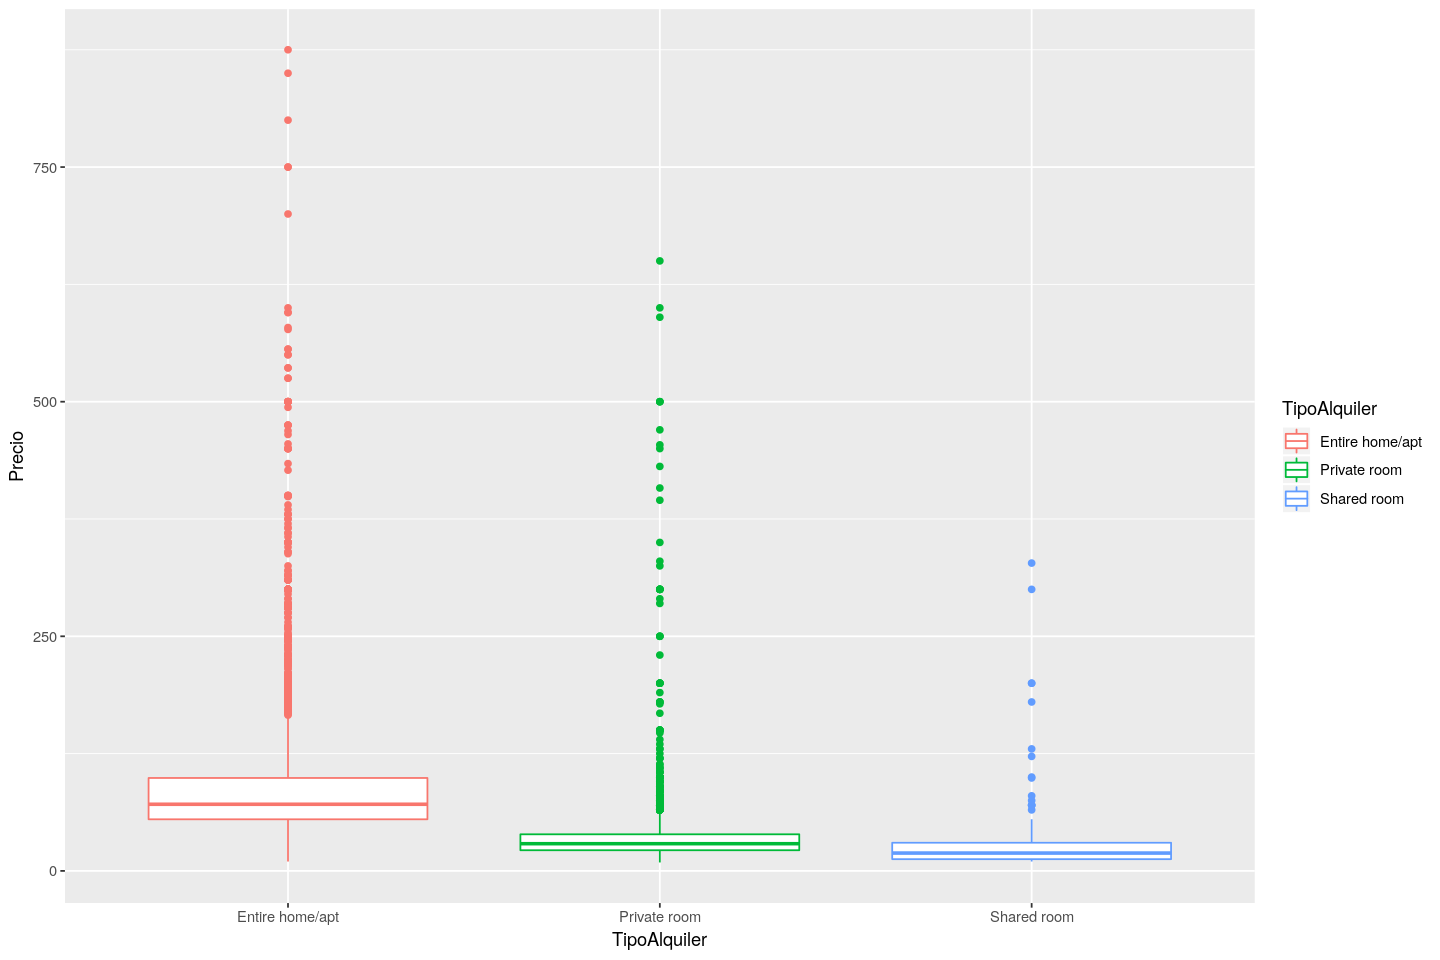

In [55]:
#Dibujamos boxplot para mostrar la distribución de los precios por cada tipo de alquiler

options(repr.plot.height=8,repr.plot.width=12)

ggplot(data=airbnb,aes(x=TipoAlquiler,y=Precio,color=TipoAlquiler)) + geom_boxplot()

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [56]:
#Para calcular el precio medio de los 3 grupos, utilizamos la funcion aggregate

aggregate(Precio ~ TipoAlquiler,airbnb,mean,na.rm=T)

TipoAlquiler    Precio  
1 Entire home/apt 87.29661
2 Private room    34.25514
3 Shared room     29.85340

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”


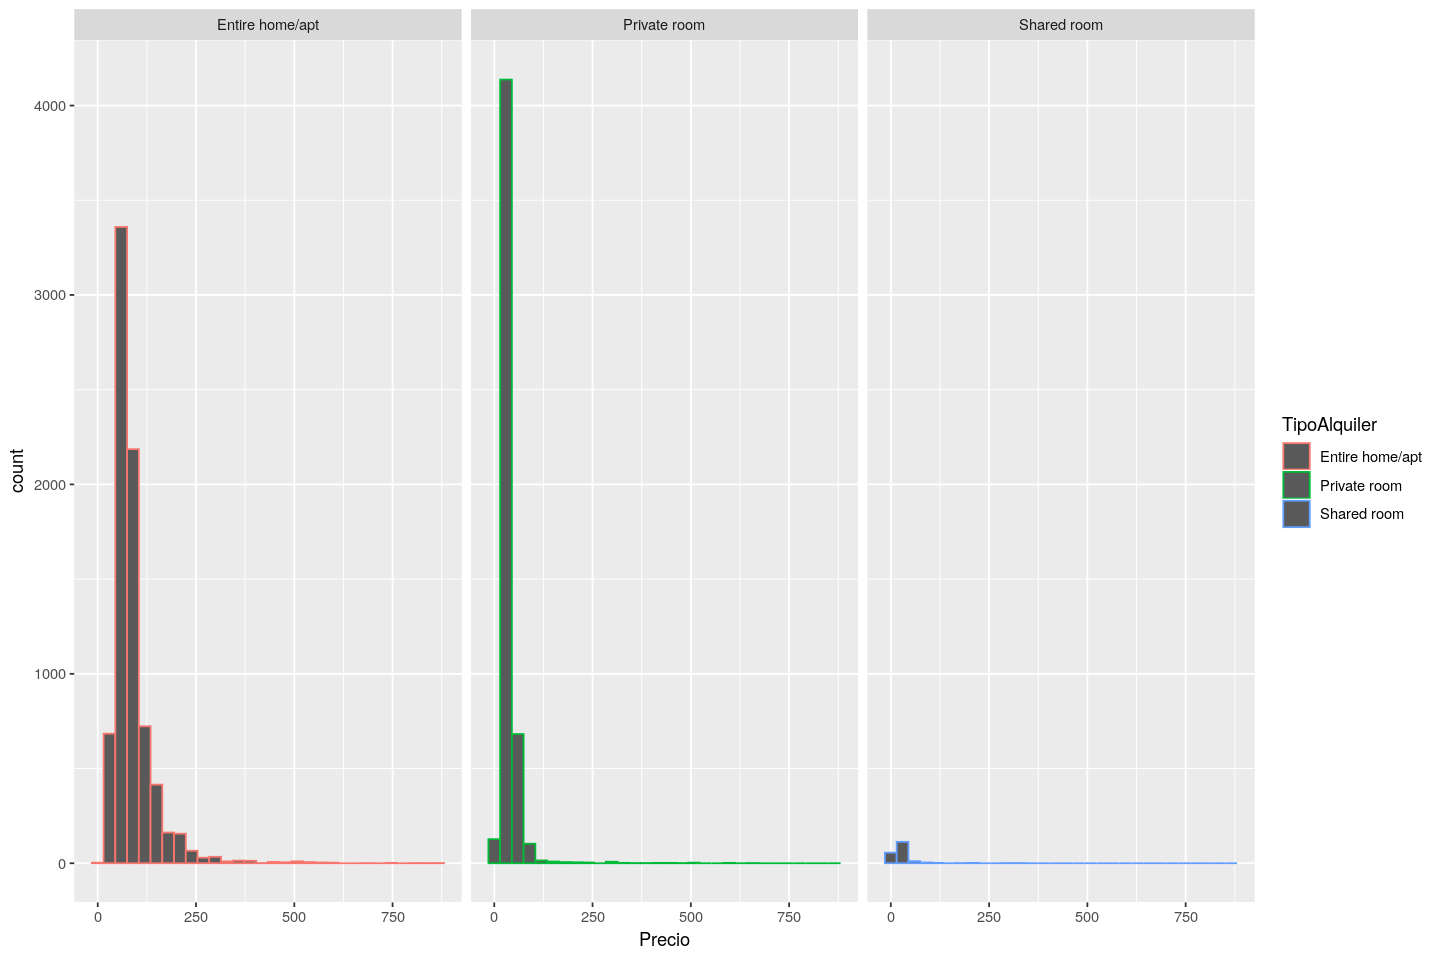

In [58]:
#Para ver la distribución de cada grupo, podemos realizar la función de densidad de cada uno:

ggplot(data=airbnb,mapping = aes(x=Precio,colour=TipoAlquiler)) + geom_histogram() + facet_grid(.~TipoAlquiler)

Tal y cómo hemos visto en clase y comentado en los hilos de slack. Para poder determinar si la variable *Precio* es estadisticamente 
significativa tenemos que realizar los siguientes pasos:

*Comprobar si la distribución es gaussiana -> Utilizamos el test de Shapiro
    *Si es gaussiana -> Test Anova
    *Si no es gaussiana - > Test Kruskal

In [60]:
#Para cada uno de los tipos de alquiler aplicamos el test de Shapiro:

shapiro.test(airbnb$Precio[airbnb$Precio=='Entire home/apt'])

ERROR: Error in shapiro.test(airbnb$Precio[airbnb$Precio == "Entire home/apt"]): sample size must be between 3 and 5000


In [65]:
#Como se puede ver en el punto anterior, tenemos que coger una muestra mas pequeña ya que el test de Shapiro sólo puede tratar
#muestras de tamaño entre 3 y 5000 observaciones

airbnb_5000=airbnb[sample(1:nrow(airbnb),5000),]
shapiro.test(airbnb_5000$Precio[airbnb_5000$TipoAlquiler == "Entire home/apt"])
shapiro.test(airbnb_5000$Precio[airbnb_5000$TipoAlquiler == "Private room"])
shapiro.test(airbnb_5000$Precio[airbnb_5000$TipoAlquiler == "Shared room"])



	Shapiro-Wilk normality test

data:  airbnb_5000$Precio[airbnb_5000$TipoAlquiler == "Entire home/apt"]
W = 0.63767, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  airbnb_5000$Precio[airbnb_5000$TipoAlquiler == "Private room"]
W = 0.37456, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  airbnb_5000$Precio[airbnb_5000$TipoAlquiler == "Shared room"]
W = 0.45036, p-value = 9.466e-15


**Si nos fijamos en el p-value, podemos deducir que la distribución no es gaussiana ya que el valor p es muy pequeño**. Por esta razón vamos a utilizar el test de Kruskal para ver la significancia de la variable

In [66]:
kruskal.test(Precio~TipoAlquiler,data=airbnb)


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


**El test de Kruskal nos da un valor p muy pequeño, y un valor de grupo de 2. Podemos decir que el test encuentra significancia en al menos 2 grupos de los 3**

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [68]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=='Entire home/apt',]

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [70]:
head(sort(table(airbnb_entire$Barrio),decreasing=T),5)


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [82]:
airbnb_precio5_br <- aggregate(Precio ~ Barrio,airbnb_entire,mean,na.rm=T)

head(airbnb_precio5_br[order(airbnb_precio5_br$Precio,decreasing=T),],5)



Barrio        Precio  
77 Palomas       309.7500
50 Fuentelareina 180.0000
93 Recoletos     161.9254
43 El Plantío    150.0000
30 Castellana    141.3889

¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [102]:
airbnb_2 <- data.frame(table(airbnb_entire$Barrio))
colnames (airbnb_2) <- c('Barrio','Freq')

#Creamos nuevo dataframe mergeando con la tabla anterior de precios

airbnb_barrios <- merge(airbnb_2,airbnb_precio5_br,by='Barrio')

head(airbnb_barrios[order(airbnb_barrios$Precio,decreasing=T),],5)


Barrio        Freq Precio  
77 Palomas         4  309.7500
50 Fuentelareina   2  180.0000
93 Recoletos     135  161.9254
43 El Plantío      1  150.0000
30 Castellana     73  141.3889

Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [106]:
#En primer lugar filtramos el dataframe con los barrios que tienen más de 100 entradas. Usamos el dataframe del punto anterior
airbnb_barrios_100 <- barrios_top5[barrios_top5$Freq>100,]

#Mostramos los 5 barrios con mayor precio (ordenamos y mostramos con head)

barrios_top5 <- head(airbnb_barrios_100[order(airbnb_barrios_100$Precio,decreasing=T),],5)

barrios_top5

Barrio    Freq Precio   
93  Recoletos 135  161.92537
52  Goya      142  111.33803
106 Sol       701  100.75036
108 Trafalgar 223   98.57848
59  Justicia  534   98.25468

Dibuja el diagrama de densidad de distribución de los diferentes precios

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 9 rows containing non-finite values (stat_bin).”


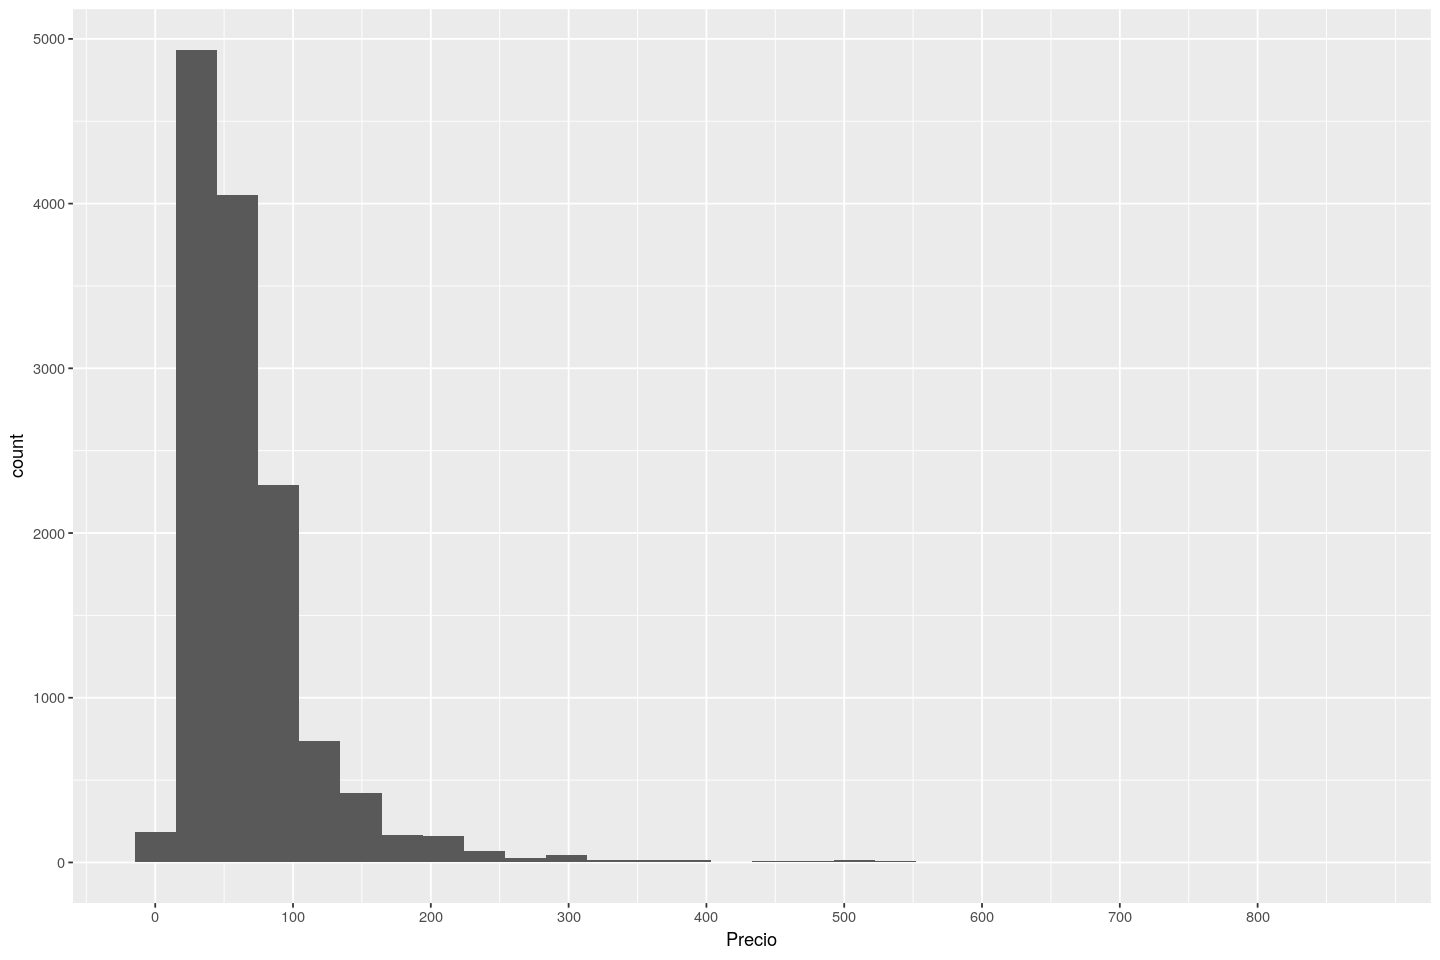

In [90]:
#Vamos a dibujar el diagrama de densidad del dataset original, sin filtros

ggplot(data=airbnb,aes(x=Precio)) + geom_histogram() + scale_x_continuous(breaks=seq(0,800,100))

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con precio y número de entradas

In [115]:
#Partimos del dataset original y nos quedamos con los 5 barrios anteriores

airbnb_5barrios_dens <- airbnb[airbnb$Barrio == barrios_top5$Barrio,]

#Calculamos metros medios para todos los barrios

airbnb_metros_medios <- aggregate(MetrosCuadrados ~ Barrio,airbnb_5barrios_dens,mean,na.rm=T)

#Mergeamos con la tabla anterior

airbnb_barrios_top5 <- merge(barrios_top5,airbnb_metros_medios,by='Barrio')

airbnb_barrios_top5


Warning message in `==.default`(airbnb$Barrio, barrios_top5$Barrio):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


Barrio    Freq Precio    MetrosCuadrados
1 Goya      142  111.33803 45.01150       
2 Justicia  534   98.25468 22.99349       
3 Recoletos 135  161.92537 19.97415       
4 Sol       701  100.75036 46.66827       
5 Trafalgar 223   98.57848 41.71345

Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

Warning message in `==.default`(airbnb$Barrio, airbnb_barrios_top5$Barrio):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


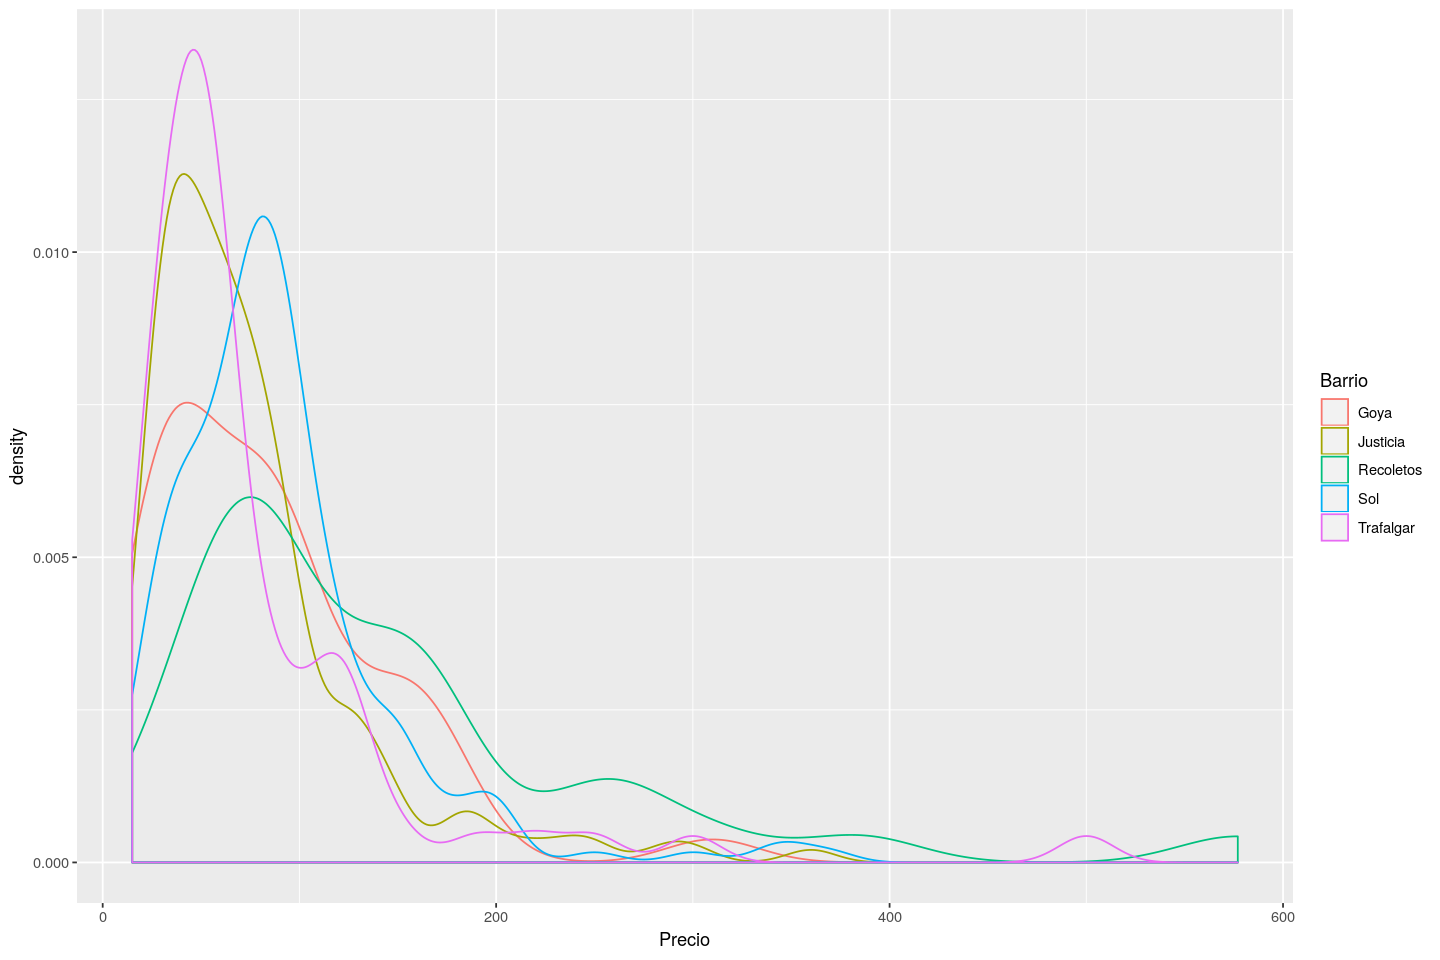

In [117]:
#Para realizar el diagrama de densidad de distribución, necesito todos los valores del dataset

airbnb_density_br <- airbnb[airbnb$Barrio == airbnb_barrios_top5$Barrio,]

ggplot(data=airbnb_density_br,aes(x=Precio,color=Barrio)) + geom_density()

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [118]:
#Observamos de nuevo las medias pro cada barrio
airbnb_barrios_top5[,c('Barrio','MetrosCuadrados')]

Barrio    MetrosCuadrados
1 Goya      45.01150       
2 Justicia  22.99349       
3 Recoletos 19.97415       
4 Sol       46.66827       
5 Trafalgar 41.71345

In [119]:
#Ahora vamos a observar la distribución de la variable metros cuadrados del dataset total original

summary(airbnb$MetrosCuadrados)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00   10.03   35.12   60.02  480.03   12688 

**Se puede observar como la mayor parte de los valores son NAs, eso ya nos indica que la variable no es buena. Por otro lado observando las medias, si que hay ciertas diferencias estadísticas entre los barrios. Goya, Sol y Trafalgar respecto al grupo de Recoletos o Justicia. No obstante, y partiendo del supuesto de que no es una distribución normal, aplicamos el test de kruskal de nuevo:**

In [196]:
kruskal.test(MetrosCuadrados ~ Barrio,data=airbnb_density_br)


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 4.4902, df = 4, p-value = 0.3437


**Se observa que el p-value es superior a 0,05, se entiende que la variable no es significativa**

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [166]:
#En primer lugar, vamos a filtrar los datos, para quedarnos con los pisos de alquiler del Barrio de SOL

airbnb_Sol <- airbnb_entire[airbnb_entire$Barrio=='Sol',]

#Vamos a quedarnos solo con las columnas que necesitamos

airbnb_Sol_ok <- airbnb_Sol[,c('NumBanyos','NumDormitorios','MaxOcupantes','MetrosCuadrados','Precio')]

head(airbnb_Sol_ok)

NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados Precio
15 1         1              4            60.01534         75   
16 1         2              6                  NA        130   
17 1         1              4                  NA        100   
18 1         2              6                  NA        160   
19 1         1              4                  NA         49   
21 1         1              4                  NA         70

In [168]:
#Tenemos que quitar los registros en los que metros cuadrados sean NA

#airbnb_Sol_ok <- na.omit(airbnb_Sol)
airbnb_Sol_ok_sin_na <- airbnb_Sol_ok[!is.na(airbnb_Sol_ok$MetrosCuadrados),]
head(airbnb_Sol_ok_sin_na)


NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados Precio
15  1         1              4             60.01534        75   
25  1         1              4             69.95596       100   
46  1         1              2             24.99091        65   
47  1         0              3              0.00000        41   
570 2         2              5              0.00000        90   
574 2         4              8            200.02016       250

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [169]:
corr <- cor(airbnb_Sol_ok_sin_na[,1:4])
corr

NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
NumBanyos       1.0000000 0.6873719      0.7017290    0.4820549      
NumDormitorios  0.6873719 1.0000000      0.7853809    0.5684521      
MaxOcupantes    0.7017290 0.7853809      1.0000000    0.4286233      
MetrosCuadrados 0.4820549 0.5684521      0.4286233    1.0000000

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


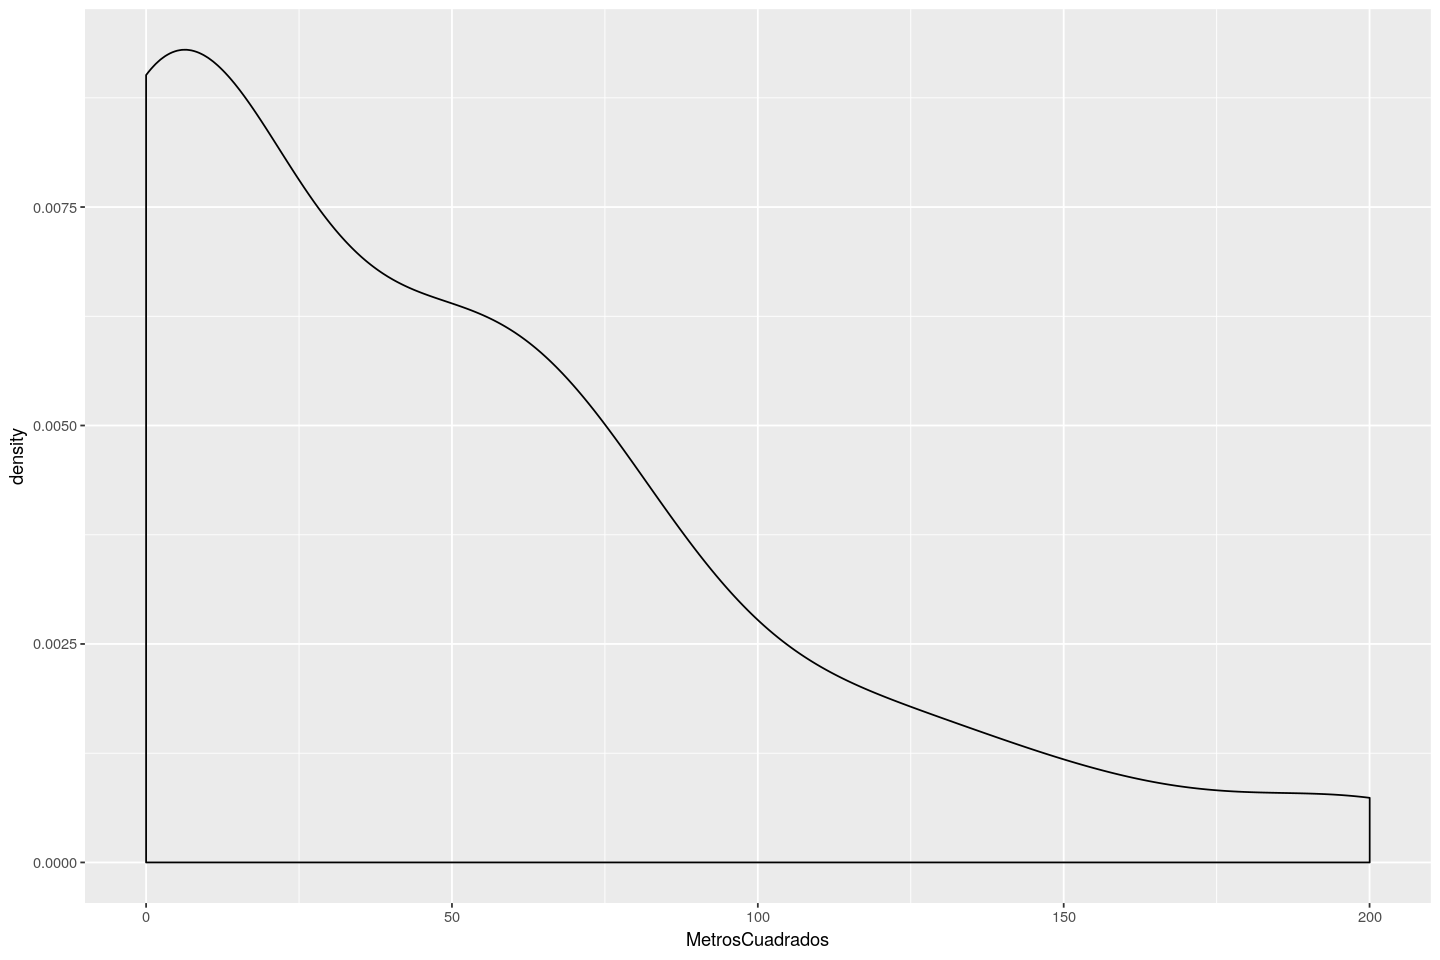

In [170]:
ggplot(data=airbnb_Sol_ok_sin_na, aes(x=MetrosCuadrados))+geom_density()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.181  37.742  60.015  68.425  85.749 200.020 

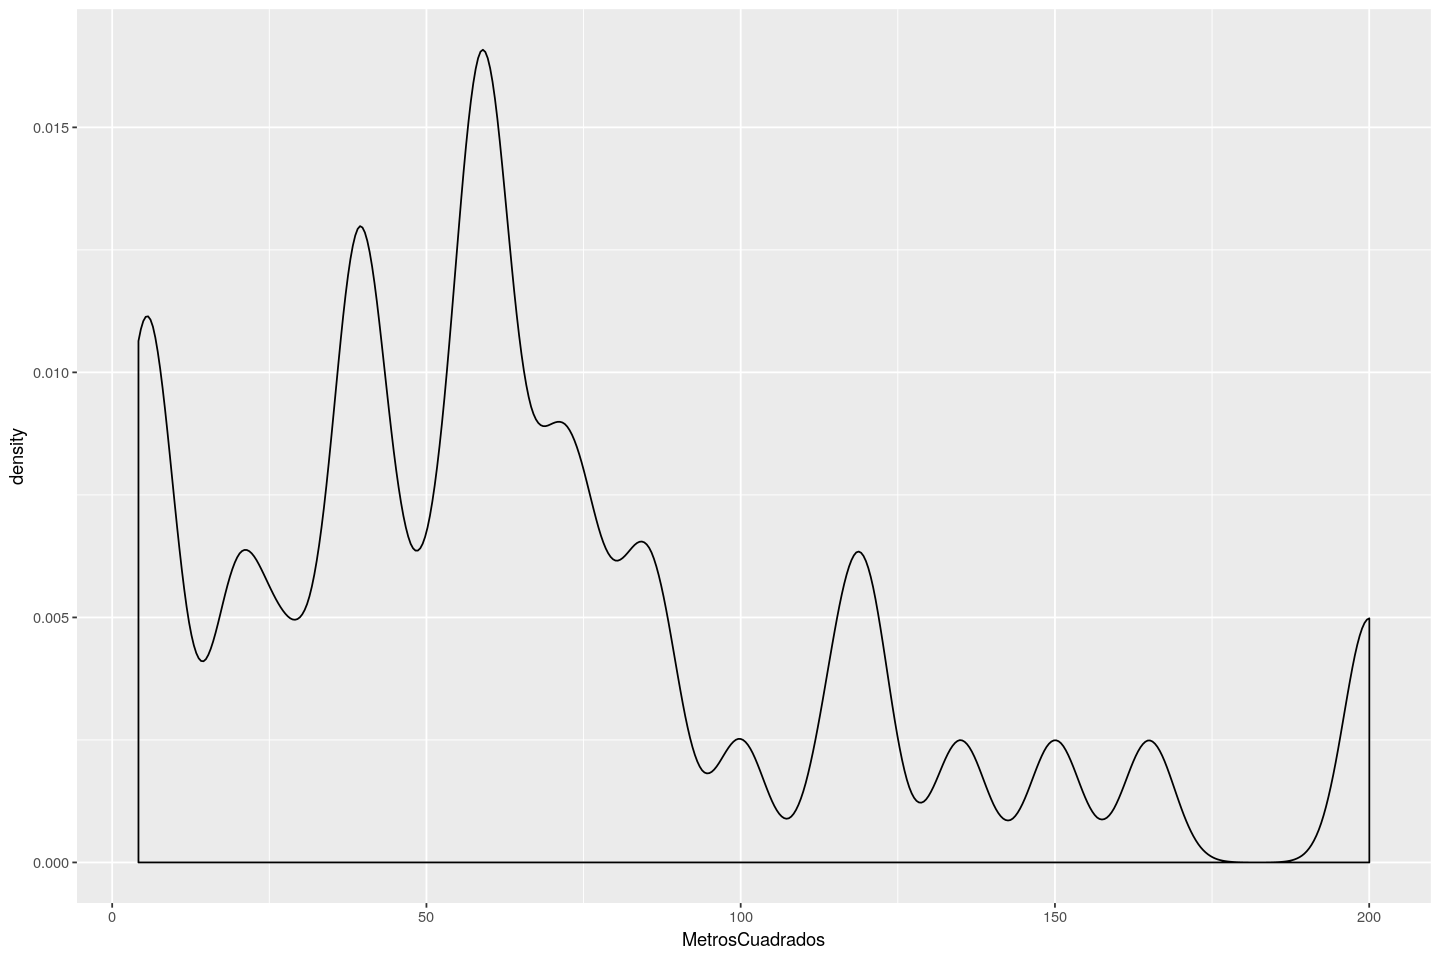

In [171]:
#Además de que se han quitado muchos NA para esta variable, se observa en la distribución, la gran cantidad de ceros.
#Esto implica que la correlación con el resto de variables sea muy baja. Vamos a quitar los ceros y volver a analizar la
#correlación:

airbnb_Sol_ok_sin0 <- airbnb_Sol_ok_sin_na[airbnb_Sol_ok_sin_na$MetrosCuadrados>0,]

summary(airbnb_Sol_ok_sin0$MetrosCuadrados)

#Volvemos a pintar la densidad para ver la curva sin ceros:

ggplot(data=airbnb_Sol_ok_sin0, aes(x=MetrosCuadrados))+geom_density(bw=4)



In [174]:
#Volvemos a calcular la correlacion
corr <- cor(airbnb_Sol_ok_sin0[,1:4])
corr

#Ahora podemos ver cómo las correlaciones han aumentado al quitar los valores que son 0 en metros cuadrados. Podria incluso
#establecerse un limite inferior para dar un minimo valor de metros real de cada apartamento.

NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
NumBanyos       1.0000000 0.7356920      0.8528252    0.5712130      
NumDormitorios  0.7356920 1.0000000      0.7841590    0.7717458      
MaxOcupantes    0.8528252 0.7841590      1.0000000    0.7108265      
MetrosCuadrados 0.5712130 0.7717458      0.7108265    1.0000000

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [176]:
#Vamos a realizar regresiones lineales para ver la mejor combinación de valores para predecir precio

modelo_multi <- lm(airbnb_Sol_ok_sin0,formula=Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados)
summary(modelo_multi)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = airbnb_Sol_ok_sin0)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.612 -15.964  -2.284  15.983  69.387 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      32.5859    10.7807   3.023 0.004666 ** 
NumBanyos         0.7013    13.4708   0.052 0.958778    
NumDormitorios   29.8080     7.3856   4.036 0.000281 ***
MaxOcupantes      1.9376     3.9943   0.485 0.630634    
MetrosCuadrados   0.1880     0.1578   1.192 0.241398    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.48 on 35 degrees of freedom
Multiple R-squared:  0.7562,	Adjusted R-squared:  0.7284 
F-statistic: 27.14 on 4 and 35 DF,  p-value: 2.666e-10


**Datos que pueden ser observados en el modelo: La variable con menor p value es num dormitorios, además tiene el mayor coeficiente en la recta. A priori esta variable debería ser con la que debería calcularse el precio. El resto de variables, tienen un p valor muy alto y no van a entrar en el modelo**

In [177]:
#Vamos a hacer el modelo simple utilizando solamente la variable num dormitorios:

modelo_simple <- lm(airbnb_Sol_ok_sin0,formula=Precio ~ NumDormitorios)
summary(modelo_simple)


Call:
lm(formula = Precio ~ NumDormitorios, data = airbnb_Sol_ok_sin0)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.277 -15.644  -4.069  19.931  62.723 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      40.767      7.646   5.332 4.69e-06 ***
NumDormitorios   39.302      3.799  10.344 1.32e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.33 on 38 degrees of freedom
Multiple R-squared:  0.7379,	Adjusted R-squared:  0.731 
F-statistic:   107 on 1 and 38 DF,  p-value: 1.321e-12


**Podemos ver como el R cuadrado es incluso superior que con el modelo multiple, por lo que este modelo predice mejor la variable precio.**

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [178]:
#Vamos a realizar el modelo lineal con metros cuadrados y comparamos

modelo_simple_metros <- lm(airbnb_Sol_ok_sin0,formula=Precio ~ MetrosCuadrados)
summary(modelo_simple_metros)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = airbnb_Sol_ok_sin0)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.175 -21.635  -6.466  20.533 128.270 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      46.5709    10.3852   4.484 6.55e-05 ***
MetrosCuadrados   0.8342     0.1229   6.786 4.80e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.53 on 38 degrees of freedom
Multiple R-squared:  0.5479,	Adjusted R-squared:  0.536 
F-statistic: 46.05 on 1 and 38 DF,  p-value: 4.795e-08


**Si nos fijamos en el R cuadrado, es bastante inferior al del modelo de numero de habitaciones, por lo que la variable numero de habitaciones es más fiable**

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [181]:
margen_confianza_metros <- confint(modelo_simple_metros)
margen_confianza_metros

2.5 %      97.5 %   
(Intercept)     25.5471054 67.594737
MetrosCuadrados  0.5853331  1.083027

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [182]:
margen_confianza_hab <- confint(modelo_simple)
margen_confianza_hab

2.5 %    97.5 %  
(Intercept)    25.28828 56.24528
NumDormitorios 31.61069 46.99334

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

Para este calculo vamos a utilizar una distribución binomial. Obtenemos el número de apartamentos en alquiler con 3 dormitorios en Sol, y el número de apartamentos en alquiler con 3 dormitorios en el total del conjunto y aplicamos:


In [194]:
apartamentos_sol_3dorm <- nrow(airbnb_entire[airbnb_entire$NumDormitorios==3 & airbnb_entire$Barrio =='Sol',])
apartamentos_sol_3dorm

[1] 55

In [193]:
apartamentos_3dorm <- nrow(airbnb_entire[airbnb_entire$NumDormitorios==3,])
apartamentos_3dorm

[1] 724

In [195]:
#Los apartamentos de 3 dormitorios en Sol son 55 y en el total de Madrid son 724
#Aplicamos la función de la distribución binomial

binom.test(apartamentos_sol_3dorm,apartamentos_3dorm)


	Exact binomial test

data:  apartamentos_sol_3dorm and apartamentos_3dorm
number of successes = 55, number of trials = 724, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.05773843 0.09773584
sample estimates:
probability of success 
            0.07596685 


**Según el resultado del test, la probabilidad de éxito de encontrar un apartamento de éstas carácterísticas es de 7,596%**